In [1]:
!pip install transformers tensorflow datasets kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.7 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 239.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 197.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.0/782.0 kB 203.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 197.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.1/436.1 kB 241.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 256.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 255.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 205.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 219.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 216.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-an

In [3]:
!if [ ! -e ~/.kaggle/kaggle.json ]; then mkdir -p ~/.kaggle; cp ~/kaggle.json ~/.kaggle; echo "done"; fi
!chmod 600 ~/.kaggle/kaggle.json
!ls -alR ~/.kaggle

done
/opt/app-root/src/.kaggle:
total 12
drwxr-sr-x.  2 1006090000 1006090000 4096 Oct  5 08:28 .
drwxrwsr-x. 12 root       1006090000 4096 Oct  5 08:28 ..
-rw-------.  1 1006090000 1006090000   69 Oct  5 08:28 kaggle.json


In [6]:
# https://nihcc.app.box.com/v/ChestXray-NIHCC

#kaggle datasets list

!rm -rf chest_xray
!kaggle datasets download paultimothymooney/chest-xray-pneumonia
!if [ ! -d chest_xray.dataset ]; then unzip -q chest-xray-pneumonia.zip; mv chest_xray chest_xray.dataset; fi
!rm -rf chest_xray.dataset/__MACOSX
!echo "Download complete"

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Download complete


In [7]:
import tensorflow as tf

base = tf.keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(228,228,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

print('VGG19 Loaded')
print(base.summary())

2024-10-05 08:34:55.144032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 08:34:55.144085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 08:34:55.152759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 08:34:55.174233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 08:34:56.855711: W tensorflow/comp

80134624/80134624 [==============================] - 0s 0us/step
VGG19 Loaded
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 228, 228, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 228, 228, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 228, 228, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 114, 114, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 114, 114, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 114, 114, 128)     147584    
                                                 

In [ ]:
# Get model to output 3D feature maps (height, width, features)
altmodel = tf.keras.models.Sequential()

# Layer 1
altmodel.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(228, 228, 3)))
altmodel.add(tf.keras.layers.Activation('relu'))
altmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 2
altmodel.add(tf.keras.layers.Conv2D(32, (3, 3)))
altmodel.add(tf.keras.layers.Activation('relu'))
altmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 3
altmodel.add(tf.keras.layers.Conv2D(64, (3, 3)))
altmodel.add(tf.keras.layers.Activation('relu'))
altmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Apply flattening function to convert 3D feature maps in to 1D feature vectors
altmodel.add(tf.keras.layers.Flatten())  

# Add 2 final dense layers to add a classifier to the convolutional base
altmodel.add(tf.keras.layers.Dense(64))
altmodel.add(tf.keras.layers.Activation('relu'))
altmodel.add(tf.keras.layers.Dropout(0.5))
altmodel.add(tf.keras.layers.Dense(1))
altmodel.add(tf.keras.layers.Activation('sigmoid'))

# Compile the model
altmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Print model summary
print(altmodel.summary())


Processing chest_xray.dataset/val...
Listing chest_xray.dataset/val/NORMAL
Sample NORMAL2-IM-1440-0001.jpeg


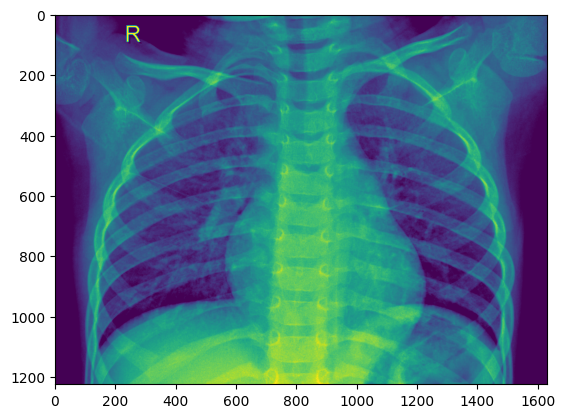

Sample NORMAL2-IM-1442-0001.jpeg


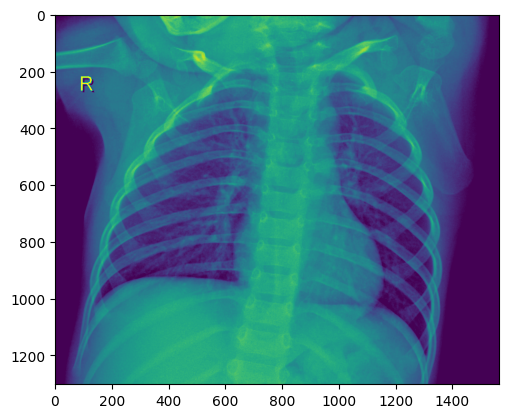

Listing chest_xray.dataset/val/PNEUMONIA
Sample person1950_bacteria_4881.jpeg


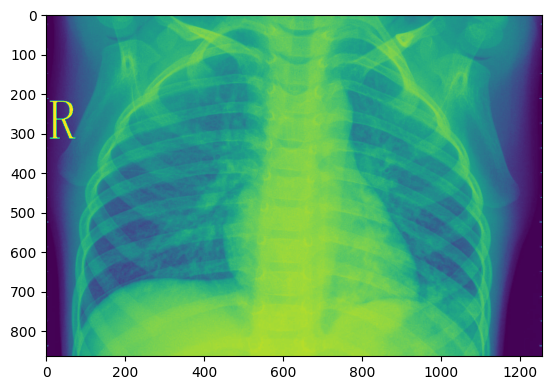

Sample person1946_bacteria_4875.jpeg


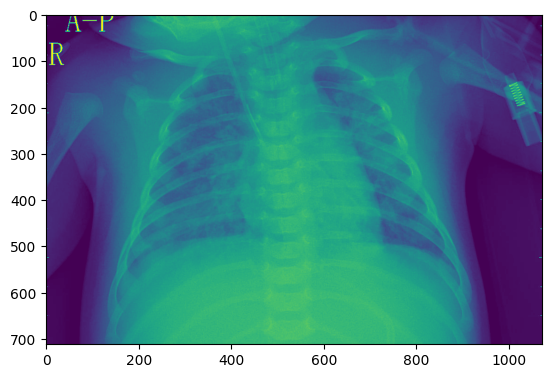

Found 16 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step
Processing chest_xray.dataset/train...
Listing chest_xray.dataset/train/NORMAL
Sample NORMAL2-IM-0903-0001.jpeg


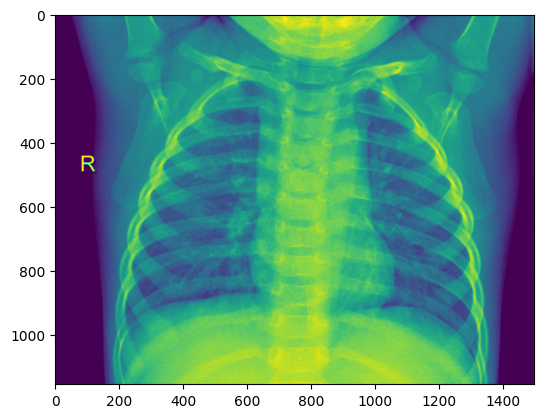

Sample IM-0453-0001.jpeg


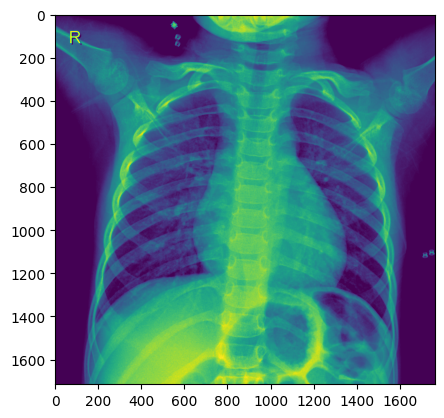

Listing chest_xray.dataset/train/PNEUMONIA
Sample person456_virus_943.jpeg


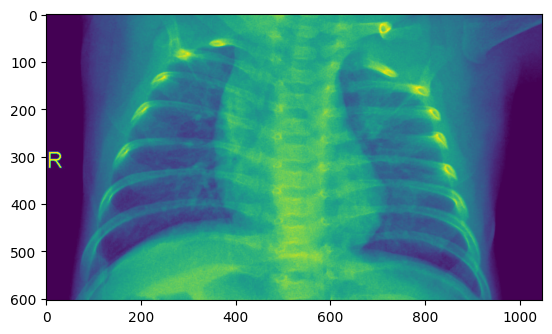

Sample person122_virus_229.jpeg


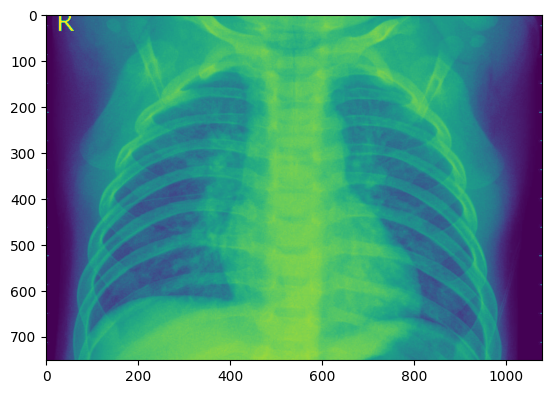

Found 5216 images belonging to 2 classes.
2/2 [==============================] - 9s 3s/step


In [ ]:
import os, matplotlib, numpy
import matplotlib.image, matplotlib.pyplot

# Specify dataset size
batch_size = 50

# Specify reference for directory paths
dataset_root = "chest_xray.dataset"
classifications = [ "NORMAL", "PNEUMONIA" ]
folders = [ "val", "train", "test" ]

#def preprocess_data(examples):
def dataset_size(directory, labels, showSample=False):
    size = 0 
    for label in labels:
        path = "{}/{}".format(directory, label)
        print("Listing {}".format(path))
        contents = os.listdir(path)
        size += len(contents)
        if showSample:
            for pic_file in  numpy.random.choice(contents, 2):
                print("Sample {}".format(pic_file))
                img = matplotlib.image.imread("{}/{}".format(path,pic_file))
                matplotlib.pyplot.imshow(img)
                matplotlib.pyplot.show()
    return size    

def extract_features(directory, sample_amount):
    features = numpy.zeros(shape=(sample_amount, 7, 7, 512)) 
    labels = numpy.zeros(shape=(sample_amount))
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255) 
    generator = datagen.flow_from_directory(
        directory, target_size=(228, 228), 
        batch_size = batch_size, 
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

# Apply extraction function to 3 datasets
dataset = {}
dataset['features'] = {}
dataset['labels'] = {}

for folder in folders:
    path = "{}/{}".format(dataset_root, folder)
    print("Processing {}...".format(path))
    num_samples = dataset_size(path, classifications, True)
    features, labels = extract_features(path, min(1000, num_samples))
    dataset['features'][folder] = features
    dataset['labels'][folder] = labels

# Shape data
reshape_y = 7 * 7 * 512
for folder in folders:
    print("Reprocessing {}...".format(folder))
    dataset['features'][folder] = np.reshape(dataset['features'][folder], (len(dataset['features'][folder]), reshape_y))

print("Complete")


In [25]:
import re
import os
import tensorflow as tf
#from sklearn.model_selection import train_test_split

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.15.1


In [ ]:
# Build classifier on top of  VGG19
model = tf.keras.models.Sequential()

# Add dense layers on top of VGG19 
# 1
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=reshape_y))
# 2
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

# Save VGG19 results
model.save('models/model_VGG_01.h5')